**Forest Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import f1_score,precision_score,recall_score,confusion_matrix,accuracy_score,roc_auc_score,classification_report
from sklearn.model_selection import GridSearchCV,KFold,StratifiedKFold,cross_val_score,train_test_split,RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [ ]:
data=pd.read_csv('Fraud_check.csv')
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [ ]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [ ]:
data1=data.copy()

list=[]
for i in range(0,len(data)):
  if data['Taxable.Income'][i]<=30000:
    list.append('Risky')
  elif data['Taxable.Income'][i]>30000:
    list.append('Good')

data1['loan_type']=list
data1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,loan_type
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


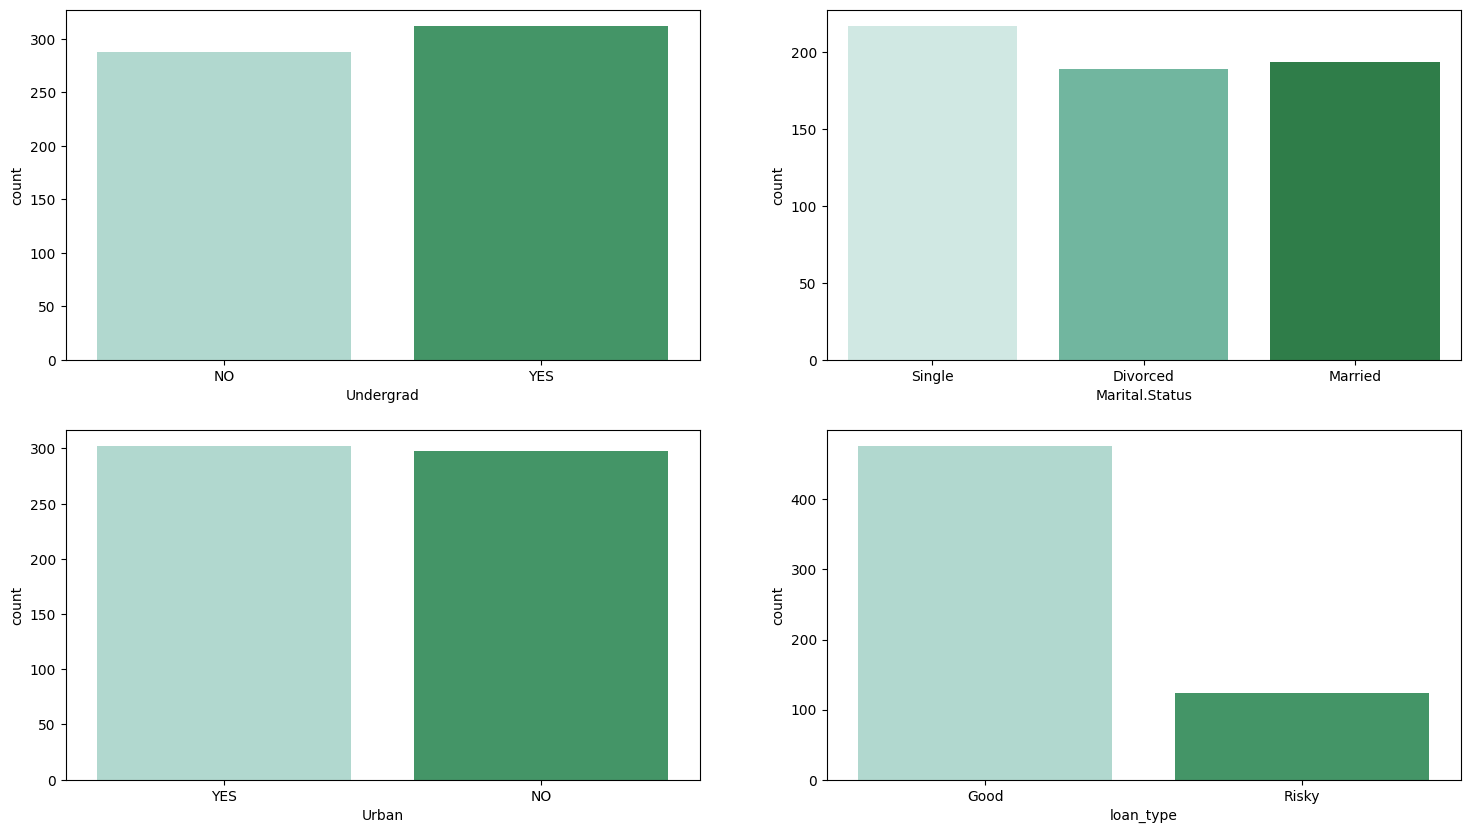

In [ ]:
#Countplot for categorical feature
plt.figure(figsize=(18,10))

plt.subplot(2,2,1)
sns.countplot(x='Undergrad',data=data1,palette='BuGn')
plt.subplot(2,2,2)
sns.countplot(x='Marital.Status',data=data1,palette='BuGn')

plt.subplot(2,2,3)
sns.countplot(x='Urban',data=data1,palette='BuGn')
plt.subplot(2,2,4)
sns.countplot(x='loan_type',data=data1,palette='BuGn')

plt.show()

<Axes: xlabel='Work.Experience', ylabel='Count'>

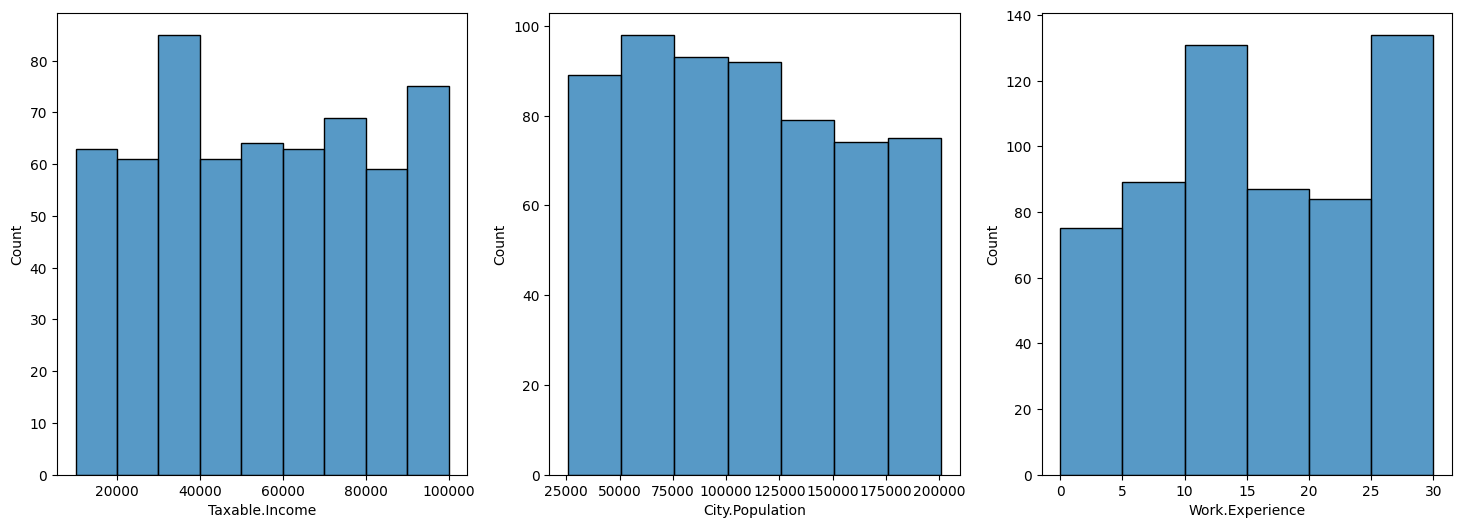

In [ ]:
#Histogram for continuous variables
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
sns.histplot(data1['Taxable.Income'],bins=range(min(data1['Taxable.Income']),max(data1['Taxable.Income'])+10000,10000))

plt.subplot(1,3,2)
sns.histplot(data1['City.Population'],bins=range(min(data1['City.Population']),max(data1['City.Population'])+25000,25000))

plt.subplot(1,3,3)
sns.histplot(data1['Work.Experience'],bins=range(min(data1['Work.Experience']),max(data1['Work.Experience'])+5,5))

<Axes: >

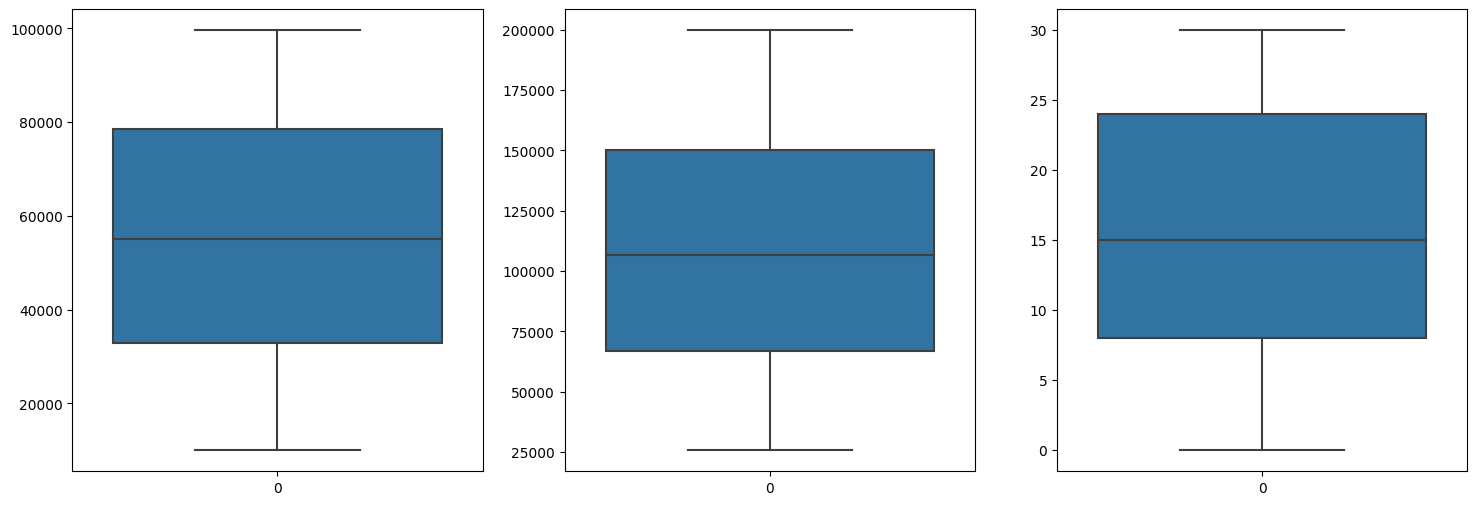

In [ ]:
#Boxplot for outlier detection

plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
sns.boxplot(data1['Taxable.Income'])

plt.subplot(1,3,2)
sns.boxplot(data1['City.Population'])

plt.subplot(1,3,3)
sns.boxplot(data1['Work.Experience'])

In [ ]:
loan_asset_risky=pd.DataFrame
loan_asset_good=pd.DataFrame

loan_asset_risky=data1.loc[data1['loan_type']=='Risky']
loan_asset_good=data1.loc[data1['loan_type']=='Good']

**Taxable Income wrt Fraud**

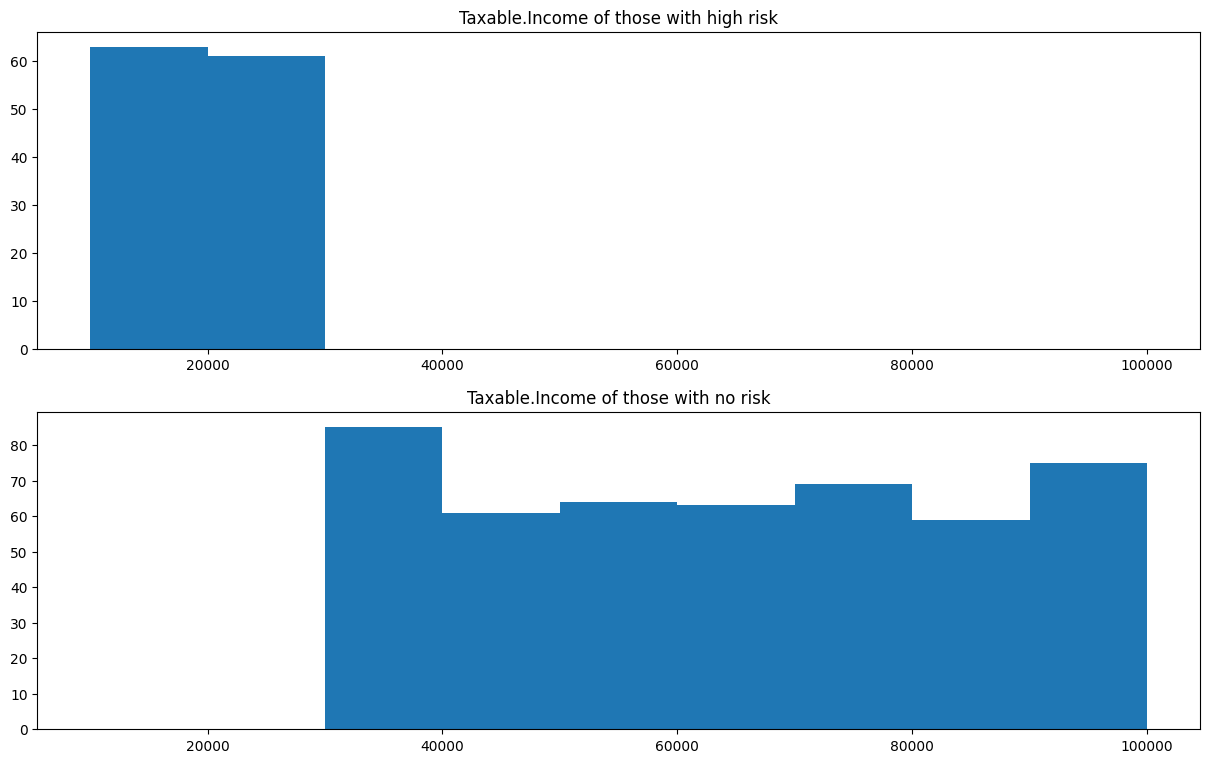

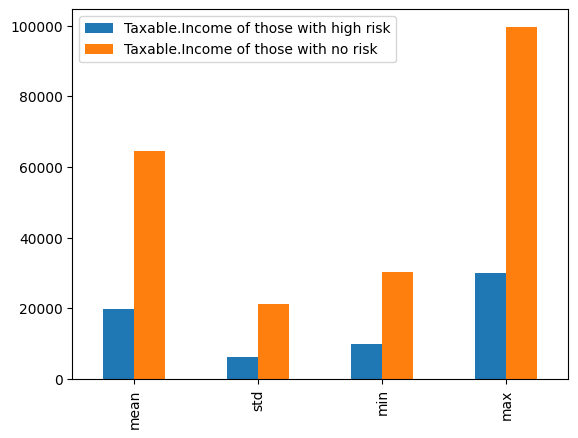

In [ ]:
plt.figure(figsize=(15,14))

plt.subplot(3,1,1)
plt.hist(loan_asset_risky['Taxable.Income'], bins=range(min(data1['Taxable.Income']), max(data1['Taxable.Income']) + 10000, 10000))
plt.title('Taxable.Income of those with high risk')

plt.subplot(3,1,2)
plt.hist(loan_asset_good['Taxable.Income'],  bins=range(min(data1['Taxable.Income']), max(data1['Taxable.Income']) + 10000, 10000))
plt.title('Taxable.Income of those with no risk',)



income_describe = pd.DataFrame()

income_describe['Taxable.Income of those with high risk'] = loan_asset_risky['Taxable.Income'].describe()
income_describe['Taxable.Income of those with no risk'] = loan_asset_good['Taxable.Income'].describe()
income_describe  = income_describe.drop(['count', '25%', '50%', '75%'])

plt.subplot(3,1,2)
income_describe.plot.bar()

plt.show() 
 

**Work Experience wrt Fraud**

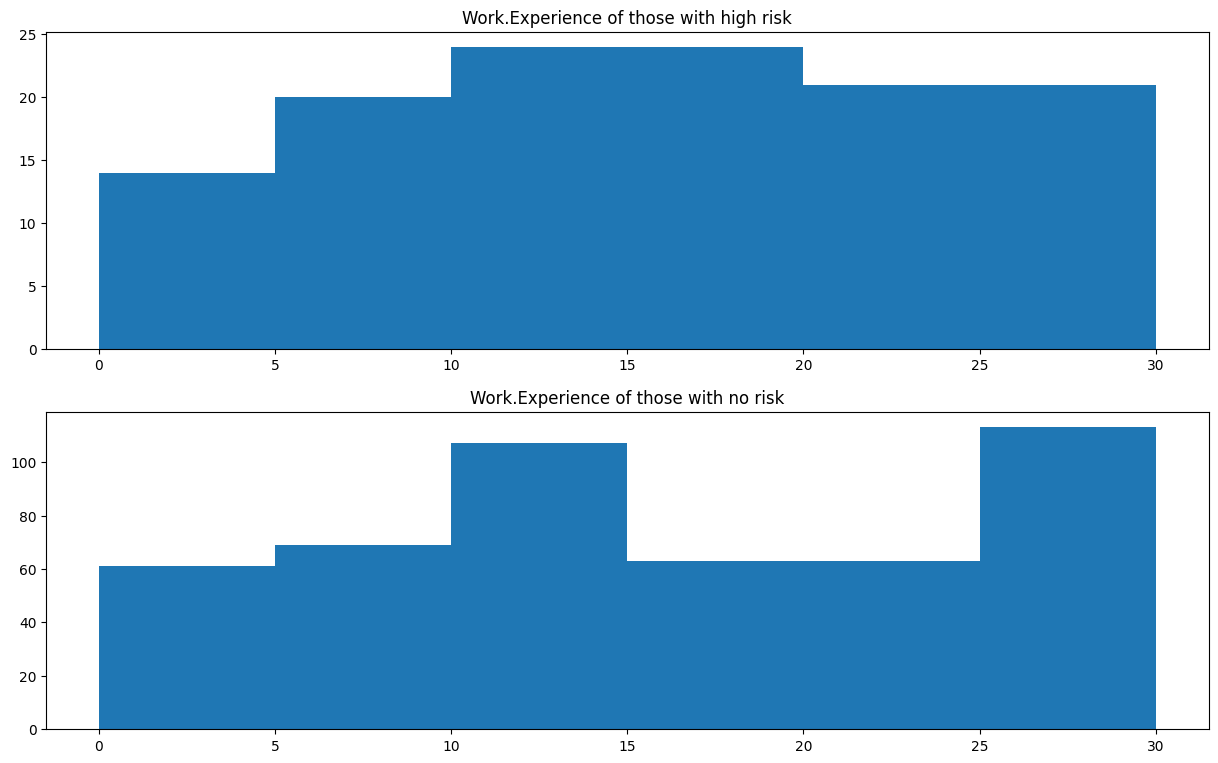

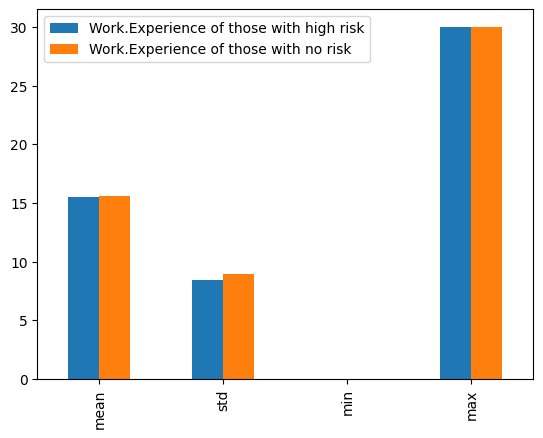

In [ ]:
plt.figure(figsize=(15,14))

plt.subplot(3,1,1)
plt.hist(loan_asset_risky['Work.Experience'], bins=range(min(data1['Work.Experience']), max(data1['Work.Experience']) + 5,5))
plt.title('Work.Experience of those with high risk')

plt.subplot(3,1,2)
plt.hist(loan_asset_good['Work.Experience'],  bins=range(min(data1['Work.Experience']), max(data1['Work.Experience']) +5, 5))
plt.title('Work.Experience of those with no risk',)



income_describe = pd.DataFrame()

income_describe['Work.Experience of those with high risk'] = loan_asset_risky['Work.Experience'].describe()
income_describe['Work.Experience of those with no risk'] = loan_asset_good['Work.Experience'].describe()
income_describe  = income_describe.drop(['count', '25%', '50%', '75%'])

plt.subplot(3,1,2)
income_describe.plot.bar()

plt.show() 
 

**Undergrad wrt Fraud**

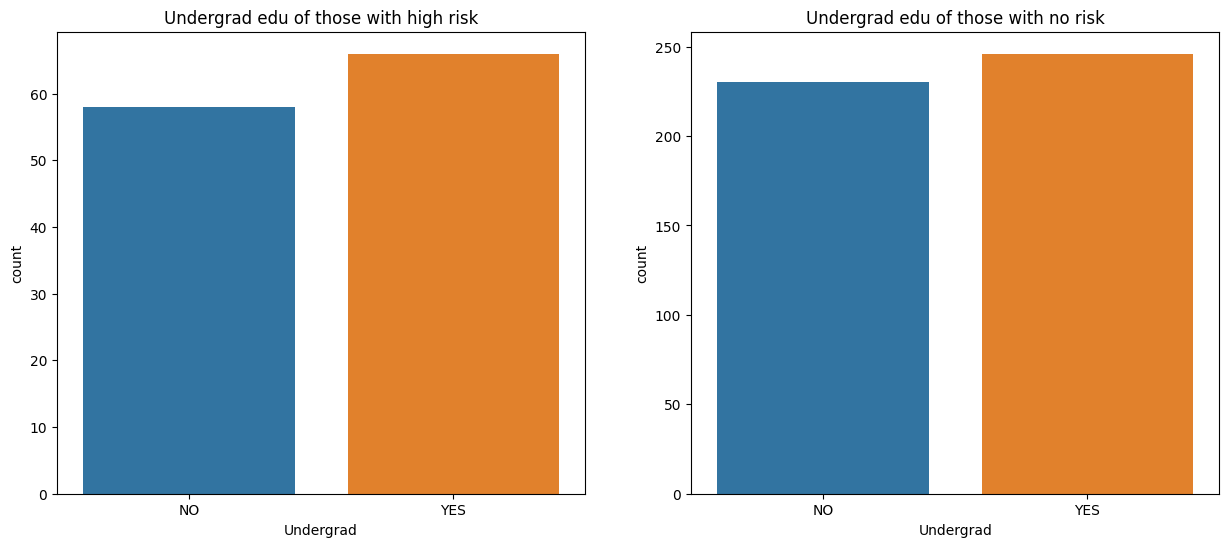

In [ ]:
plt.figure(figsize=(15,6)) 

plt.subplot(1,2,1)
sns.countplot(x='Undergrad',data=loan_asset_risky)
plt.title('Undergrad edu of those with high risk')

plt.subplot(1,2,2)
sns.countplot(x='Undergrad',data=loan_asset_good)
plt.title('Undergrad edu of those with no risk',)

plt.show() 

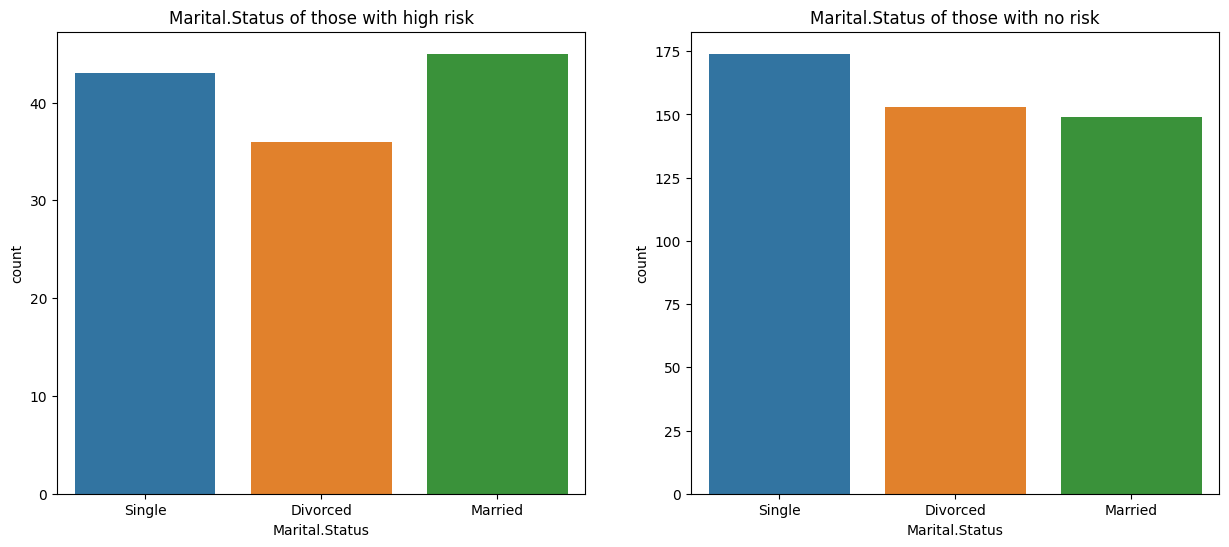

In [ ]:
plt.figure(figsize=(15,6)) 

plt.subplot(1,2,1)
sns.countplot(x='Marital.Status',data=loan_asset_risky)
plt.title('Marital.Status of those with high risk')

plt.subplot(1,2,2)
sns.countplot(x='Marital.Status',data=loan_asset_good)
plt.title('Marital.Status of those with no risk',)

plt.show() 

**Residence vs Fraud**

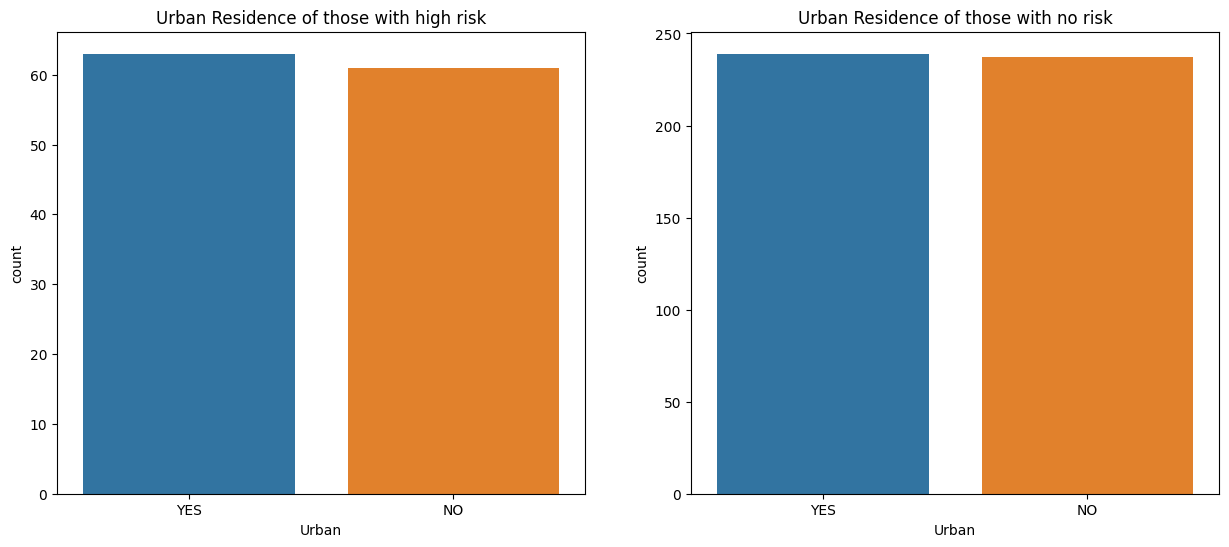

In [ ]:
plt.figure(figsize=(15,6)) 

plt.subplot(1,2,1)
sns.countplot(x='Urban',data=loan_asset_risky)
plt.title('Urban Residence of those with high risk')

plt.subplot(1,2,2)
sns.countplot(x='Urban',data=loan_asset_good)
plt.title('Urban Residence of those with no risk',)

plt.show() 

In [ ]:
data2=data1.copy()
data2=data2.rename(columns={'Undergrad':'undergrad','Marital.Status':'marital_status','Taxable.Income':'taxable_income','City.Population':'city_population','Urban':'urban','Work.Experience':'work_exp'})
data2.drop('taxable_income',axis=1,inplace=True)

In [ ]:
data2.head()

,undergrad,marital_status,city_population,work_exp,urban,loan_type
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good


In [ ]:
data2.loan_type.value_counts()

Good     476
Risky    124
Name: loan_type, dtype: int64

In [ ]:
x=data2.drop('loan_type',axis=1)
y=data2['loan_type']

In [ ]:
x=pd.get_dummies(x)

In [ ]:
le=LabelEncoder()
y=le.fit_transform(y)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [ ]:
print('shape of x_train:',x_train.shape)
print('shape of x_test :',x_test.shape)
print('shape of y_train:',y_train.shape)
print('shape of y_test:',y_test.shape)

shape of x_train: (480, 9)
shape of x_test : (120, 9)
shape of y_train: (480,)
shape of y_test: (120,)


**Building Random Forest Classifier**

In [ ]:
num_trees=100
max_features=3

kfold=KFold(n_splits=10,random_state=7,shuffle=True)

model=RandomForestClassifier(n_estimators=num_trees,max_features=max_features)
results=cross_val_score(model,x,y,cv=kfold)

print('Batchwise accuracy is:', '\n', results, '\n')
print('Overall accuracy is:', results.mean())

Batchwise accuracy is: 
 [0.73333333 0.63333333 0.81666667 0.83333333 0.73333333 0.66666667
 0.71666667 0.61666667 0.78333333 0.73333333] 

Overall accuracy is: 0.7266666666666667


**GridSearchCV for Hyperparameter tuning**

In [ ]:
kfold=KFold(n_splits=10,random_state=7,shuffle=True)

param_dict={'criterion':['gini','entropy'],
            'n_estimators':[10,25,50,75,100,125,150],
            'max_depth':[2,3,5,10,20],
            'min_samples_leaf':[5,10,20,50,100,200]}

rf=RandomForestClassifier(random_state=7)
grid=GridSearchCV(rf,param_grid=param_dict,cv=kfold)
grid.fit(x,y)

GridSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=True),
             estimator=RandomForestClassifier(random_state=7),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 75, 100, 125, 150]})

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5, 'n_estimators': 10}
0.7933333333333332


**Building final model on best parameters**

In [ ]:
model_kf=grid.best_estimator_
model_kf.fit(x,y)

results=cross_val_score(model_kf,x,y,cv=kfold)
print('Accuracy with k fold validation:',np.round(results.mean()))

Accuracy with k fold validation: 1.0


In [ ]:
model=grid.best_estimator_
model.fit(x_train,y_train)

y_pred=model.predict(x_test)
print('Accuracy with train test split:',accuracy_score(y_test,y_pred))

Accuracy with train test split: 0.7666666666666667


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        92
           1       0.00      0.00      0.00        28

    accuracy                           0.77       120
   macro avg       0.38      0.50      0.43       120
weighted avg       0.59      0.77      0.67       120



<Axes: >

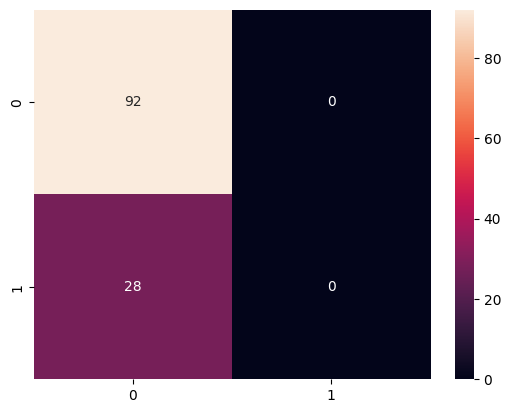

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)